In [18]:
import pandas as pd
import os

In [334]:
input_path = '../data/youtube_spam/'
files = [f for f in os.listdir(input_path) if '.csv' in f]
dfs = [pd.read_csv(os.path.join(input_path, f), engine='python') for f in files]
df = pd.concat(dfs).reset_index(drop=True)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 349
Data columns (total 5 columns):
comment_id    1956 non-null object
author        1956 non-null object
date          1711 non-null object
content       1956 non-null object
class         1956 non-null int64
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [337]:
df.columns = [c.lower() for c in df.columns]
df.head()

,comment_id,author,date,content,class
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


Text(0.5, 1.0, 'Non-Spam Contents')

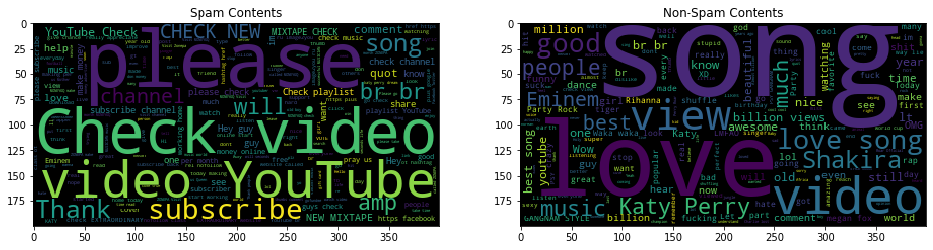

In [338]:
# data exploration
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wc(text):
    wc = WordCloud().generate(' '.join(text))
    return wc

content_spam = df[df['class'] == 1]['content']
content_nonspam = df[df['class'] == 0]['content']

wc_spam = create_wc(content_spam)
wc_nonspam = create_wc(content_nonspam)
ax = plt.subplots(1, 2, figsize=(16, 8))
ax1 = ax[0].get_axes()[0]
ax2 = ax[0].get_axes()[1]

ax1.imshow(wc_spam)
ax2.imshow(wc_nonspam)

ax1.set_title('Spam Contents')
ax2.set_title('Non-Spam Contents')

In [386]:
import re
from bs4 import BeautifulSoup
import nltk

def print_sample(df, message, n=10, col='content'):
    print(message)
    print(df[col].iloc[:n])
    print()

# clean html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df.content = df.content.apply(strip_html)
print_sample(df, 'after html cleaning')

# case folding
df.content = df.content.apply(lambda x: x.lower())
print_sample(df, 'after case folding')

# clean special character
def remove_special_characters(text):
    pattern = r'[^\w]'
    text = re.sub(pattern, ' ',text)
    return text

def preprocessing_pipeline(text):
    text = strip_html(text)
    text = remove_special_characters(text)
    return text

df.content = df.content.apply(remove_special_characters)
print_sample(df, 'after special character cleaning')

# stemming
# remove the stem of original word, useful to reduce the number of feature and prevent overfitting
# you may skip it if you have enough dataset

# TODO: consider to skip this?
# ps = nltk.porter.PorterStemmer()
# def simple_stemmer(text):
#     text = ' '.join([ps.stem(word) for word in text.split()])
#     return text
# df.review = df.review.apply(simple_stemmer)
# print_sample(df, 'after stemming')

# removing the stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=True):
    tokens = text.split()
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df.content = df.content.apply(remove_stopwords)
print_sample(df, 'after stopword removal')

after html cleaning
0                                       2 19 best part
1                                          wierd funny
2    hey guys human want human want sexy fucking gi...
3                         party rock lol wants shuffle
4                                           party rock
5                                              shuffle
6                                                  omg
7                                      song really fun
8                                               awsome
9                                   wow increible song
Name: content, dtype: object

after case folding
0                                       2 19 best part
1                                          wierd funny
2    hey guys human want human want sexy fucking gi...
3                         party rock lol wants shuffle
4                                           party rock
5                                              shuffle
6                                                  

[nltk_data] Downloading package stopwords to /Users/bytedance-
[nltk_data]     it105533/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<strong>Feature Extraction</strong>

In [394]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=2)
bow = vectorizer.fit_transform(df.content)
bow

<1956x14679 sparse matrix of type '<class 'numpy.int64'>'
	with 269281 stored elements in Compressed Sparse Row format>

In [395]:
import numpy as np

word_idx = vectorizer.get_feature_names()
first_row_vec = np.array(bow[0].todense())[0]

word_count_d = dict(zip(word_idx, first_row_vec))

print('Original ')
print(df.content.iloc[0])

for w, c in word_count_d.items():
    if c != 0:
        print(w, c)

Original 
2 19 best part
 1 1
 19 1
 19  1
 2 1
 2  1
 b 1
 be 1
 bes 1
 best 1
 p 1
 pa 1
 par 1
 part 1
19 1
19  1
2  1
9  1
ar 1
art 1
art  1
be 1
bes 1
best 1
best  1
es 1
est 1
est  1
pa 1
par 1
part 1
part  1
rt 1
rt  1
st 1
st  1
t  2


<strong>Modelling</strong>

In [396]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import eli5

X_train, X_test, y_train, y_test = train_test_split(bow, df['class'], test_size=0.3)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# bow_sample = vectorizer.fit_transform(sample_texts)
feat_imp_df = pd.DataFrame({'feature': vectorizer.get_feature_names(), 'coefficient': clf.coef_[0]})
feat_imp_df.sort_values('coefficient', ascending=False)

/Users/bytedance-it105533/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,feature,coefficient
13485,ub,0.656681
2892,31,0.603714
4561,bs,0.589859
4050,as,0.541000
9220,ment,0.540767
...,...,...
6037,ents,-0.453299
9223,ments,-0.460297
2429,view,-0.471150
2428,vie,-0.471150


<strong>Evaluation</strong>

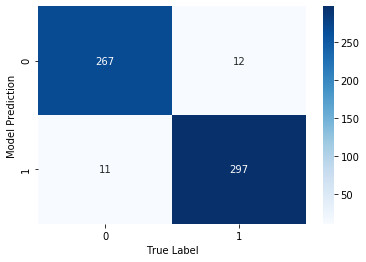

In [397]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.color_palette('viridis')
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('True Label')
ax.set_ylabel('Model Prediction')
plt.show()

In [398]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('Accuracy: %.2f' % acc)
print('Precision: %.2f' % pre)
print('Recall: %.2f' % rec)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96


<strong>Debugging</strong>

In [354]:
for t in df[df['class'] == 0]['content']:
    print(t)

2 19 best part
wierd funny
party rock lol wants shuffle
party rock
shuffle
omg
song really fun
awsome
wow increible song
love song much
2015 likeee
miss people dressed like
2011 last year decent music
best song ever
super nice love musique
wowwwwwwwwwwwwwwwwwwwwwwwwwwwwww
party rock 8
thumbs watched 2011
increidebl
lmfao
superr
2015 llikee
yeah let start party
awesome song needed 4 years reach 800 mil views tango switch bitch needed 1 year fairrrrrrr
nice girl
remember back popular everyone school shuffling crazy
lmfao
super awesome video
dance 3
always favorite songbut favorite part 3 40 4 11 video
party rock
lmfao party rock anthem ft lauren bennett goo https youtu kq6zr6kcpj8 box man got moves makes meh smile
best song ever hire
funny mahogany lmao actually know brother uncle part lmfao
party rock anthem love party rock anthem life
stop top 1
ahhh back life suck
party rock xd
cute
lmfao best songs ever
fuckin love song sexy know
shuffle hard made earthquake nepal
nice
still reminds 

In [355]:
from eli5.lime import TextExplainer
from sklearn.pipeline import make_pipeline

debug_df = df.iloc[y_test.index]
debug_df['y_true'] = y_test
debug_df['y_pred'] = y_pred

tp_query = "y_true == 1 and y_pred == 1"
fp_query = "y_true == 0 and y_pred == 1"
tn_query = "y_true == 0 and y_pred == 0"
fn_query = "y_true == 1 and y_pred == 0"

pipe = make_pipeline(vectorizer, clf)
te = TextExplainer(random_state=42)

/Users/bytedance-it105533/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bytedance-it105533/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [360]:
debug_df.query(fn_query)['content']

1164    part 2 holy mary pray us holy mother god pray ...
442                                       hello palastine
1310    yay im 11th commenter crazy please donate bitc...
1115    believe jesus christ savior sins truly believe...
691               share video song beat psy gangnam style
1337    katy perry inspirational singer voice awesome ...
1163    part 5 comforter afflicted pray us help christ...
1407                          follow instagram bigboss286
1077    message gta v 20 fifa 14 15 ps4 200 galaxy s4 ...
1148                                                  314
436                          many thumbs louis saving day
438                     447935454150 lovely girl talk xxx
967     definitley song 2010 im listening gypsy shakir...
1233    hi johnny 1 already know music thumb found way...
282                   like comment still jam song 4 years
181                             take look video youtubyou
1231    nice meet johnny 1 already know music thumb fo...
1466          

In [332]:
text = 'hey guys im 17 years old remixer producer want guys help checking videos sure love music love subscribe know'
te.fit(text, pipe.predict_proba)
te.show_prediction()

In [368]:
text = debug_df.loc[1310].content
te.fit(text, pipe.predict_proba)
te.show_prediction()

In [367]:
df[df['content'].str.contains('please')]['class'].value_counts()

1    189
0      3
Name: class, dtype: int64